In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from Clusterer import Clusterer
from FactorAnalyzer import FactorAnalyzer
c = Clusterer()
f = FactorAnalyzer()

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
help(c)

Help on Clusterer in module Clusterer object:

class Clusterer(builtins.object)
 |  Methods defined here:
 |  
 |  best_GMM_clusters(self, X, criterion='bic')
 |      Returns the best GMM clusters according to AIC or BIC and plots the criterion AIC and BIC
 |      found for each number of components used.
 |      Parameters:
 |      - X: data to be cluster of size (n_examples, n_features)
 |      - criterion: 'bic' or 'aic', criterion selected for the best gmm
 |  
 |  elbow_k_means(self, X, range_n_clusters=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]))
 |      Plots the Elbow Method for K-Means
 |      Parameters:
 |      - X: data to be clustered of size (n_instances, n_features)
 |      - range_n_clusters: sizes of the clusters considered, for instance: range_n_clusters = [2, 3, 4, 5, 6]
 |  
 |  hierarchical_clusters(self, X, method='ward', p=30, k=4)
 |      Returns the clusters predicted for each example:
 |      - X: data to cluster
 |      - method: linkage method, by default 'w

# Example

In [3]:
filename = "data/airbnb.csv"
df = pd.read_csv(filename).dropna()
df = df.groupby(['neighbourhood','city']).mean()
df = df[df.columns.difference(['id','longitude','latitude'])]
df = df._get_numeric_data()
print(df.shape)
df.head(5)

(610, 8)


,,accommodates,bathrooms,bedrooms,beds,cleaning_fee,log_price,number_of_reviews,review_scores_rating
neighbourhood,city,,,,,,,,
16th Street Heights,DC,3.442308,1.240385,1.365385,1.961538,0.673077,4.518822,21.442308,96.134615
Adams Morgan,DC,2.934066,1.703297,0.956044,1.593407,0.703297,4.626899,31.000000,96.384615
Alamo Square,SF,3.071429,1.437500,1.482143,1.696429,0.839286,5.170605,36.767857,96.303571
Albany Park,Chicago,3.714286,1.285714,1.857143,1.785714,0.642857,4.245245,21.357143,95.928571
Alhambra,LA,2.868852,1.180328,1.245902,1.721311,0.803279,4.160121,26.065574,93.934426


# K-means
### Elbow method

[128395.05946020855,
 66065.34896160272,
 39426.66979772388,
 29953.80742384914,
 23927.608848368465,
 18291.742205623337,
 15601.980755468276,
 13273.661915810775,
 11875.757599371771]

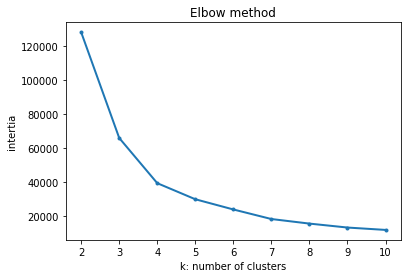

In [4]:
c.elbow_k_means(df)

### Silhouette plot

For n_clusters = 2 The average silhouette_score is : 0.546679819262802


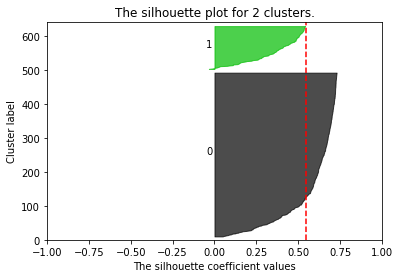

For n_clusters = 3 The average silhouette_score is : 0.4883233628319433


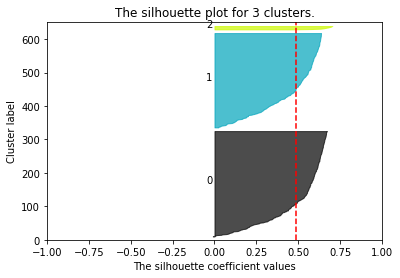

For n_clusters = 4 The average silhouette_score is : 0.48171053300617694


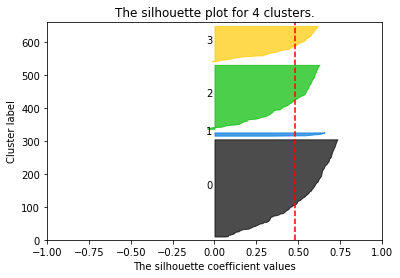

For n_clusters = 5 The average silhouette_score is : 0.4337918525296008


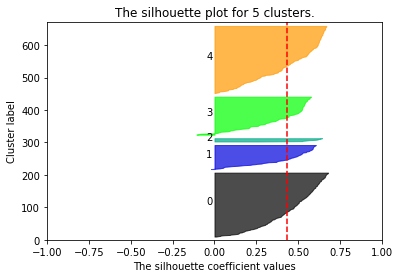

For n_clusters = 6 The average silhouette_score is : 0.4282553009184208


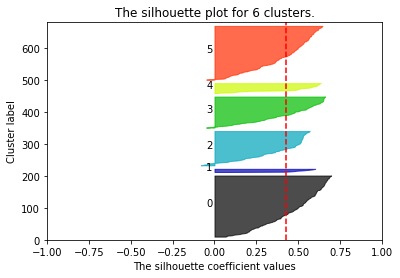

In [5]:
c.silhouette_clusters_K_Means(df)

### Clustering


Reduced inertia: 2738.632031981707
Clusters centers:


,accommodates,bathrooms,bedrooms,beds,cleaning_fee,log_price,number_of_reviews,review_scores_rating
cluster 0,1.390049,1.062090,1.375336,1.177300,0.010884,0.578930,-0.433678,0.042658
cluster 1,-0.541308,-0.314223,-0.409830,-0.421603,-0.417116,-0.819316,-0.319062,-0.201493
cluster 2,0.004936,-0.117737,-0.106186,-0.058238,0.331683,0.485361,0.376823,0.169139
cluster 3,6.249913,6.667874,6.493962,6.842599,0.644032,3.152305,-0.583577,-0.541908


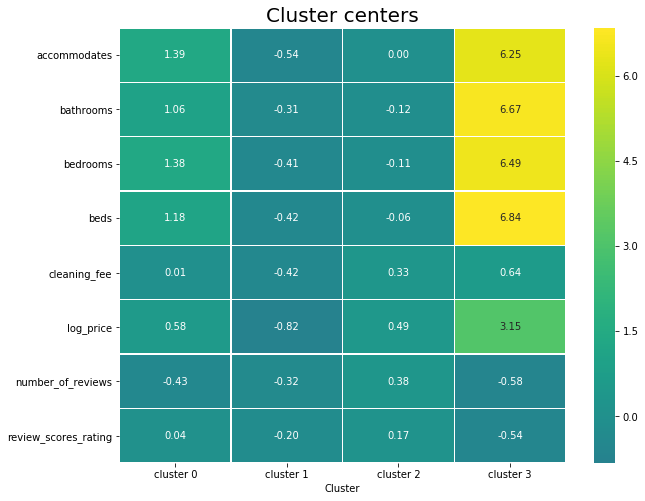

In [21]:
n_clusters = 4
clusters = c.k_means(df, n_clusters = n_clusters)

### Visualization

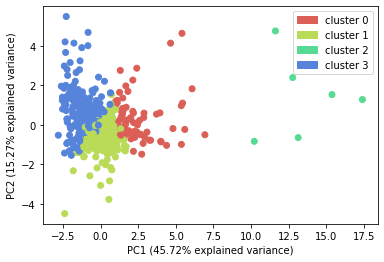

In [8]:
c.plot_cluster_2D(df, clusters)

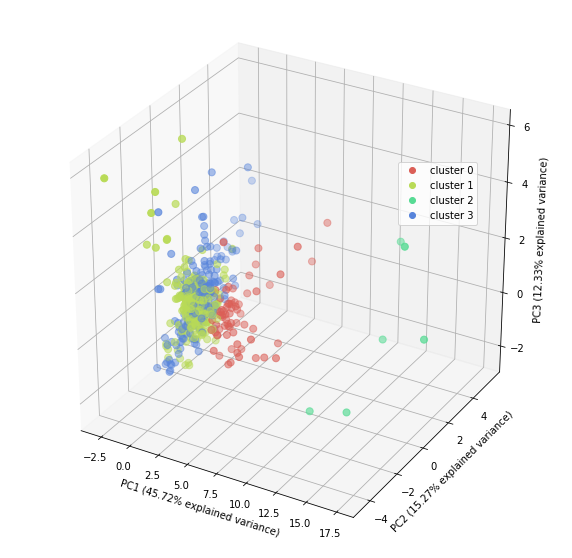

In [11]:
c.plot_cluster_3D(df, clusters, False)

# Hierarchical clustering

### Clustering

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,log_price,number_of_reviews,review_scores_rating
clusters,,,,,,,,
0,6.249913,6.667874,6.493962,6.842599,0.644032,3.152305,-0.583577,-0.541908
1,-0.374392,-0.260185,-0.289555,-0.303198,-0.261231,-0.599167,-0.318413,-0.139323
2,1.501954,0.977011,1.411058,1.329627,-0.038816,0.434181,-0.227736,0.356064
3,0.007011,-0.040994,-0.100298,-0.069847,0.371298,0.678283,0.533532,0.129231


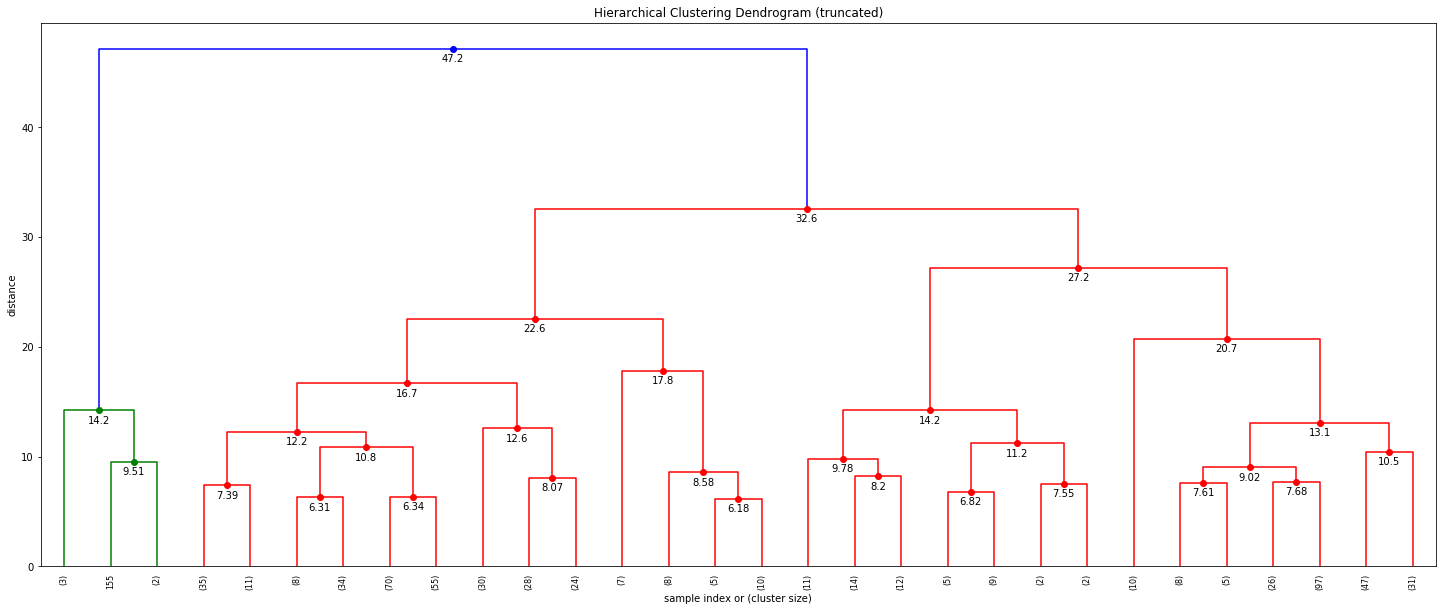

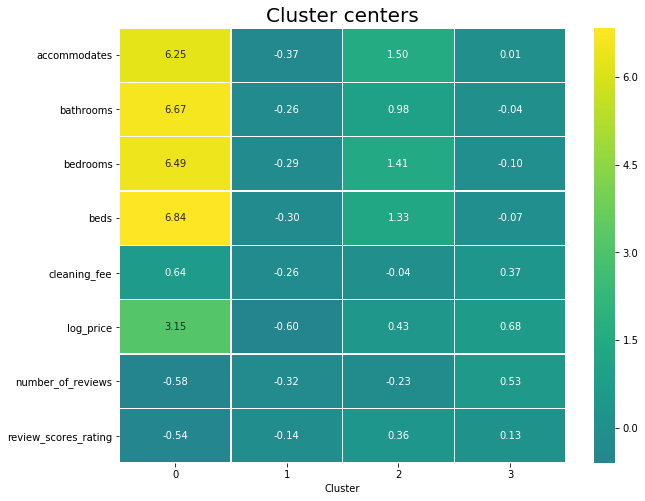

In [22]:
clusters = c.hierarchical_clusters(df, k=4)

### Visualization

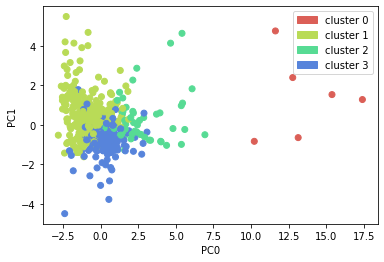

In [56]:
c.plot_cluster_2D(df, clusters)

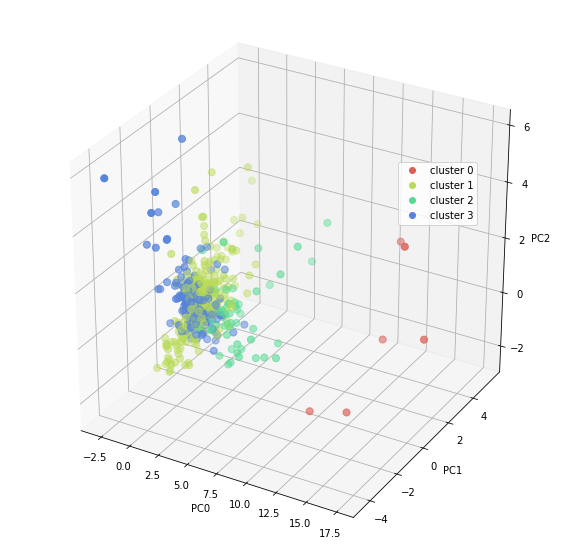

In [57]:
c.plot_cluster_3D(df, clusters)

# Gaussian Mixture Models

### Clustering with BIC

Criterion selected for clusters: BIC
Selected CV type: full
Selected number of components: 4


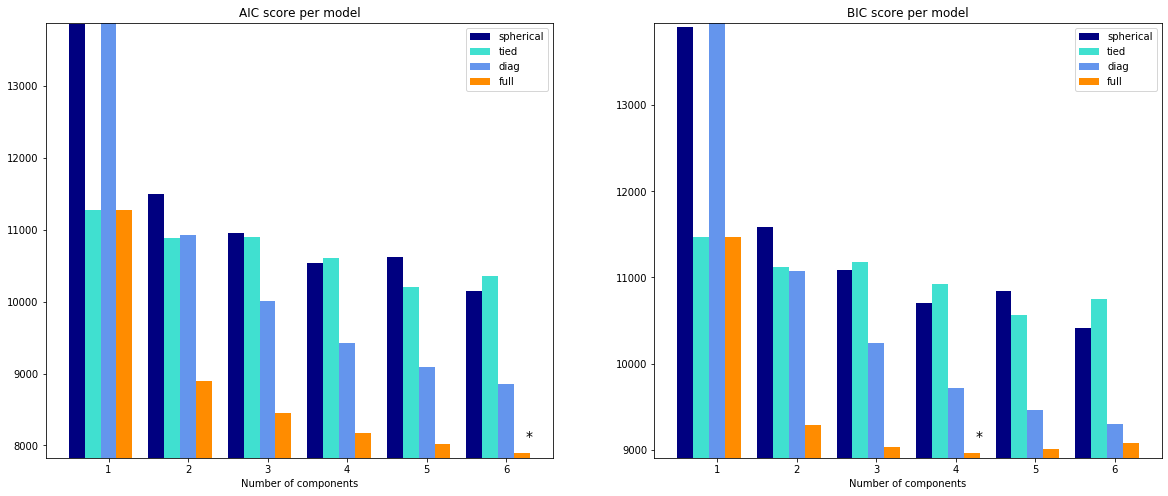

In [23]:
clusters = c.best_GMM_clusters(df, criterion='bic')

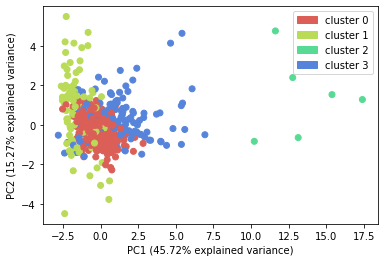

In [24]:
c.plot_cluster_2D(df, clusters)

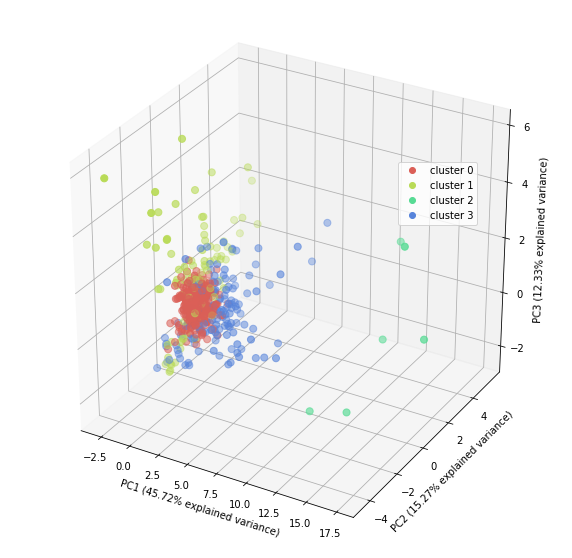

In [25]:
c.plot_cluster_3D(df, clusters)